In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visit_reasons_df = pd.read_csv('../data/visit_reasons.csv')
family_illness_df = pd.read_csv('../data/family_illnesses.csv')
symptoms_df = pd.read_csv('../data/symptoms.csv')
drug_candidates_df = pd.read_csv('../data/drug_candidates.csv')

In [3]:
# 1. Remove leading/trailing whitespace and lowercase
family_illness_df['illnesses'] = family_illness_df['0'].str.strip().str.lower()


# 3. Split multiple illnesses by comma and explode
exploded_fi = family_illness_df.assign(
    illness=family_illness_df['illnesses'].str.split(',')
).explode('illness')

# 4. Strip whitespace again and drop empty entries
exploded_fi['illness'] = exploded_fi['illness'].str.strip()
exploded_df = exploded_fi[exploded_fi['illness'] != ''].reset_index(drop=True)

# Optional: keep only the new column
exploded_fi = exploded_fi[['illness']]

In [4]:
def plot_top_categories(series, top_n=20, title="Distribution"):
    """
    Plot top categories from a Series without grouping the rest.
    Ignores the 'none' category.
    Note: This only shows the top N categories; the rest of the data is excluded.
    """
    # Remove 'none' entries (case-insensitive)
    filtered_series = series[series.str.lower() != 'none']
    
    counts = filtered_series.value_counts()
    
    # Get top N
    top = counts.head(top_n)
    
    # Convert to DataFrame for seaborn
    viz_df = top.sort_values(ascending=False).reset_index()
    viz_df.columns = ["category", "count"]
    
    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(data=viz_df, y="category", x="count", palette="viridis")
    plt.title(f"{title}. Most Data Not Shown")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()


C:\Users\suchi\AppData\Local\Temp\ipykernel_6452\1648248190.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=viz_df, y="category", x="count", palette="viridis")


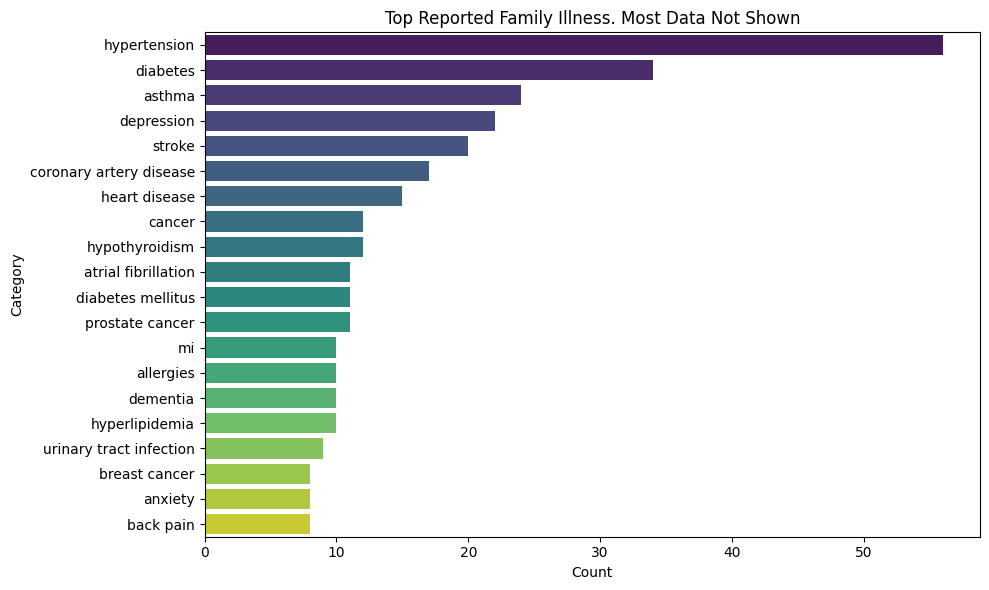

In [5]:
# Top drugs
plot_top_categories(exploded_fi['illness'], top_n=20, title="Top Reported Family Illness")

In [6]:
# Example: explode, strip whitespace, and capitalize
drug_candidates_df['drug'] = (
    drug_candidates_df['0']
    .str.split(', ')          # split by ', '
    .explode()                # create one row per drug
    .str.strip()              # remove extra spaces
    .str.upper()              # capitalize everything
    .reset_index(drop=True)   # reset index
)
drug_candidates_df['drug']

0                    PROPRANOLOL
1                      DILTIAZEM
2                   PROMETHAZINE
3      SEX HORMONE RELATED DRUGS
4                           NONE
                 ...            
209                   FLUOXETINE
210               PENTOXIFYLLINE
211                    PHENYTOIN
212      ANTI-INFLAMMATORY DRUGS
213                         NONE
Name: drug, Length: 214, dtype: object

C:\Users\suchi\AppData\Local\Temp\ipykernel_6452\1648248190.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=viz_df, y="category", x="count", palette="viridis")


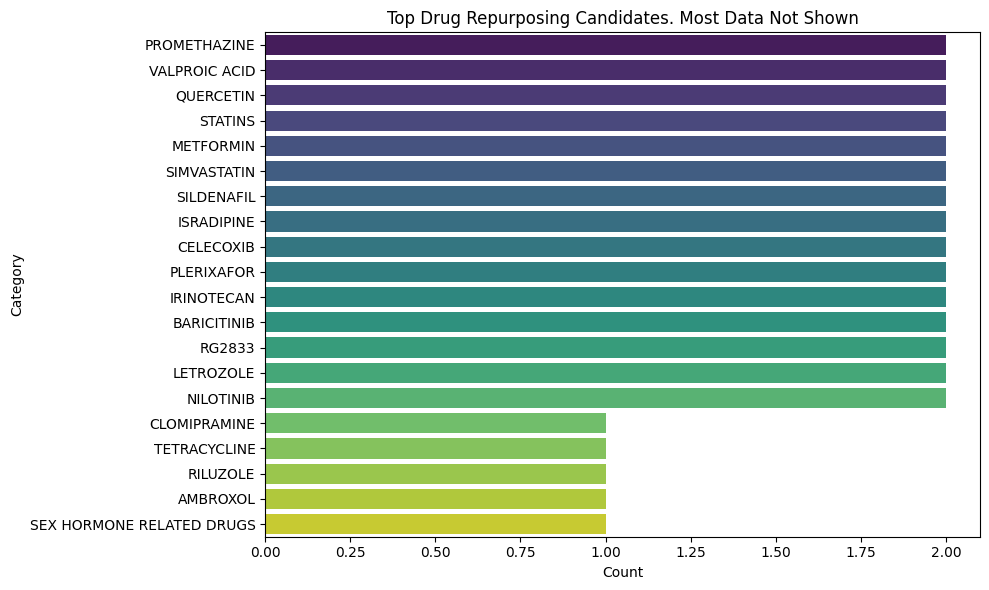

In [7]:
plot_top_categories(drug_candidates_df['drug'], title='Top Drug Repurposing Candidates')